# Initial Data Analysis

The goal of this notebook is to visualize the transformed data that we have from the spark cluster. See what we have, and what to do next.

In [1]:
import pandas as pd
import numpy as np
import glob
import os

In [2]:
# read in the transformed data
all_files = glob.glob(os.path.join('submissions-transformed/', '*.json.gz'))

# submissions = pd.read_json('submissions-transformed', lines=True)
submissions = pd.concat((pd.read_json(f, lines=True) for f in all_files))

In [ ]:
submissions.dtypes

created_on        int64
age               int64
year              int64
month             int64
day               int64
hour              int64
day_of_week       int64
subreddit        object
author           object
post_count        int64
over_18           int64
gilded            int64
archived        float64
quarantine        int64
stickied          int64
num_comments      int64
score             int64
title_length      int64
title            object
selftext         object
dtype: object

## 1. Overall Summary Statistics

In [ ]:
# 257121 number of submissions in dataset
submissions.shape

(6860219, 20)

In [3]:
# View summary stats
submissions[['score', 'num_comments']].describe()

,score,num_comments
count,6.860219e+06,6.860219e+06
mean,3.784490e+01,1.283832e+01
std,1.106446e+03,2.703225e+02
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00
50%,1.000000e+00,3.000000e+00
75%,3.000000e+00,8.000000e+00
max,2.027170e+05,7.586000e+04


# 2. Visualizations of Data

In [5]:
import matplotlib.pyplot as plt

### 2.1 Distribution of Score and Comments

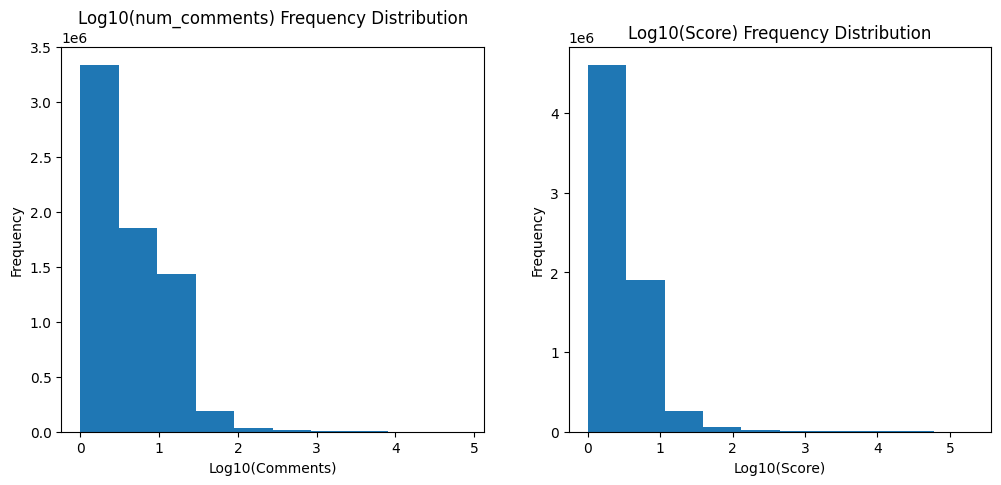

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# axes[0].hist(submissions['score'])
# axes[0].set_title('Score Frequency Distribution')
# axes[0].set_xlabel('Score')
# axes[0].set_ylabel('Frequency')

# axes[0].hist(submissions['num_comments'])
# axes[0].set_title('num_comments Frequency Distribution')
# axes[0].set_xlabel('Number of Comments')
# axes[0].set_ylabel('Frequency')

scores = submissions['score'].values
scores = np.log10(scores + 1)
axes[1].hist(scores)
axes[1].set_title('Log10(Score) Frequency Distribution')
axes[1].set_xlabel('Log10(Score)')
axes[1].set_ylabel('Frequency')

comments = submissions['num_comments'].values
comments = np.log10(comments + 1)
axes[0].hist(comments)
axes[0].set_title('Log10(num_comments) Frequency Distribution')
axes[0].set_xlabel('Log10(Comments)')
axes[0].set_ylabel('Frequency')

fig.show()
fig.savefig('./figures/2.1-dist-score-comments.jpg')

### 2.2 Scatter Plots: time vs score and time vs comments

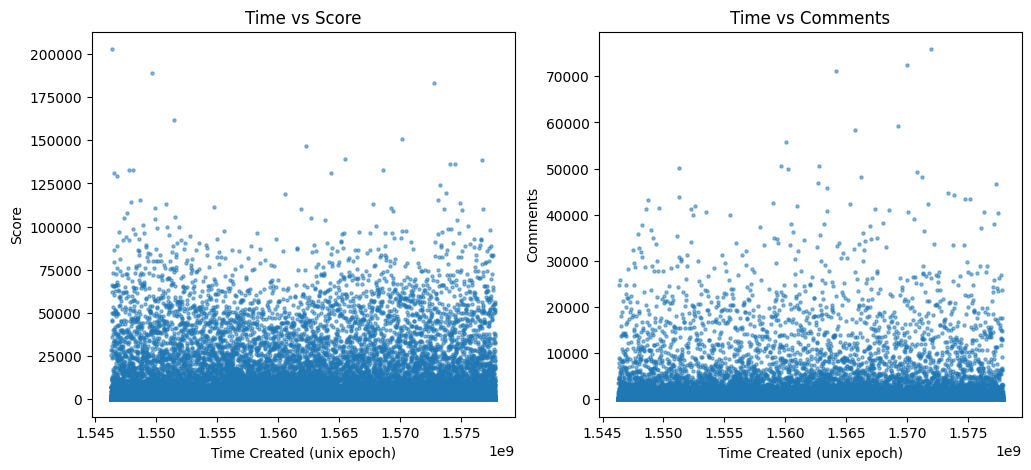

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

axes[0].scatter(submissions['created_on'], submissions['score'], alpha=0.5, s=5 )
axes[0].set_title('Time vs Score')
axes[0].set_xlabel('Time Created (unix epoch)')
axes[0].set_ylabel('Score')

axes[1].scatter(submissions['created_on'], submissions['num_comments'], alpha=0.5, s=5 )
axes[1].set_title('Time vs Comments')
axes[1].set_xlabel('Time Created (unix epoch)')
axes[1].set_ylabel('Comments')

fig.show()
fig.savefig('./figures/2.2-scatter-time-score-comments.jpg')


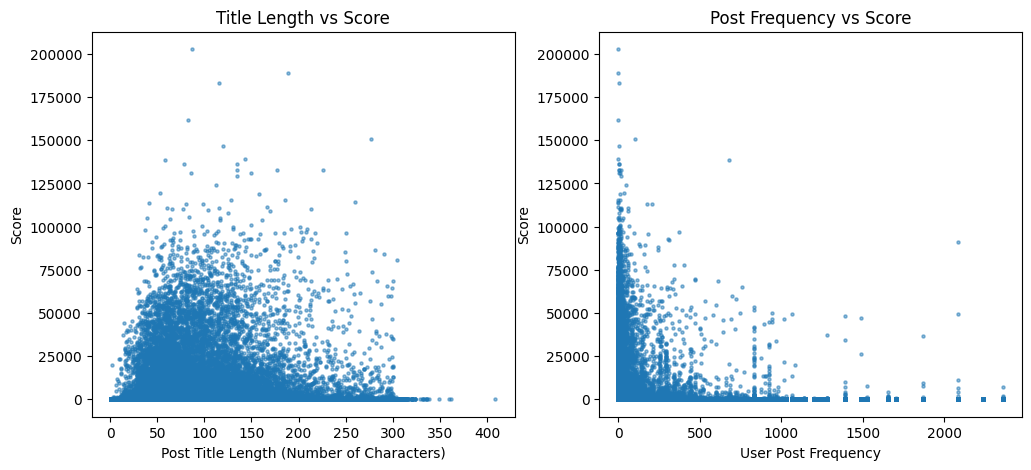

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

axes[0].scatter(submissions['title_length'], submissions['score'], alpha=0.5, s=5 )
axes[0].set_title('Title Length vs Score')
axes[0].set_xlabel('Post Title Length (Number of Characters)')
axes[0].set_ylabel('Score')

filtered = submissions[submissions['author'] != '[deleted]']
# Users posting more than 3k likely bots...
filtered = filtered[filtered['post_count'] < 3000]
axes[1].scatter(filtered['post_count'], filtered['score'], alpha=0.5, s=5 )
axes[1].set_title('Post Frequency vs Score')
axes[1].set_xlabel('User Post Frequency')
axes[1].set_ylabel('Score')

fig.show()
fig.savefig('./figures/2.2-scatter-title-postfreq-score.jpg')

## 3. Analysis of Data Skewness


- Measures such as score and num_comments is heavily right skewed (based on the dataframe describe and histogram visualizations)
- A large majority of reddit submissions are seen as "not good".
- 99% of our data are submissions with score less than 70
- Only 1% of data have scores over 70

In [ ]:
submissions['score'].quantile(0.99)

70.0

In [11]:
ninety_nine = submissions[submissions['score'] <= 70] 
one_percent = submissions[submissions['score'] > 70]

In [ ]:
ninety_nine[['score', 'num_comments']].describe()

,score,num_comments
count,6.792168e+06,6.792168e+06
mean,2.945507e+00,6.448797e+00
std,5.131703e+00,1.208463e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00
50%,1.000000e+00,3.000000e+00
75%,3.000000e+00,8.000000e+00
max,7.000000e+01,1.064000e+03


In [ ]:
one_percent[['score', 'num_comments']].describe()

,score,num_comments
count,68051.000000,68051.000000
mean,3521.152062,650.576553
std,10543.140609,2634.644580
min,71.000000,0.000000
25%,114.000000,14.000000
50%,242.000000,49.000000
75%,1192.000000,310.000000
max,202717.000000,75860.000000


### 3.1 Looking at Submissions in the Top 1% of Score

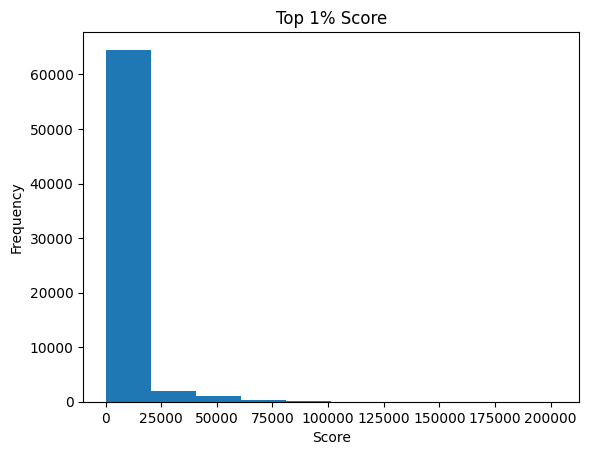

In [14]:
plt.hist(one_percent['score'])
plt.title('Top 1% Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.savefig('./figures/3.1-dist-top-one-percent-score.jpg')
plt.show()

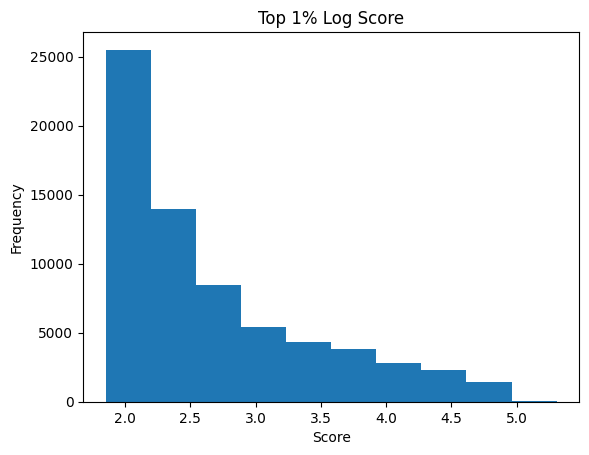

In [15]:
transformed_one_percent = one_percent['score'].values
transformed_one_percent = np.log10(transformed_one_percent)
plt.hist(transformed_one_percent)
plt.title('Top 1% Log Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.savefig('./figures/3.1-dist-top-one-percent-log-score.jpg')
plt.show()


### 3.2 Looking at Submissions in the Top 0.1% of Score

In [ ]:
submissions['score'].quantile(0.999)

7990.782000000589

In [16]:
zero_one_percent = one_percent[one_percent['score'] > 7990]
zero_one_percent[['score', 'num_comments']].describe()

,score,num_comments
count,6861.000000,6861.000000
mean,27990.985133,4074.279405
std,20471.370812,7204.147053
min,7991.000000,51.000000
25%,12530.000000,318.000000
50%,20995.000000,668.000000
75%,38011.000000,4714.000000
max,202717.000000,75860.000000


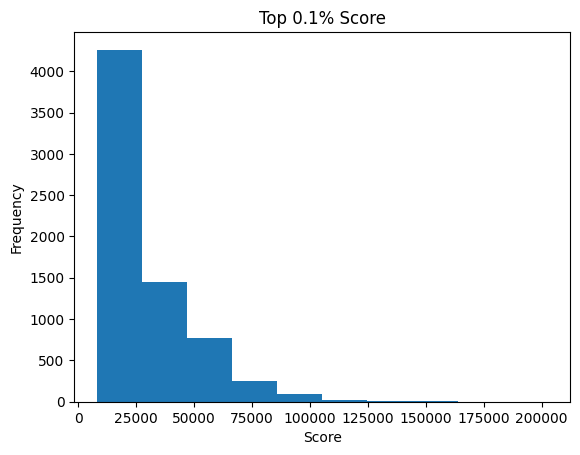

In [17]:
plt.hist(zero_one_percent['score'])
plt.title('Top 0.1% Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.savefig('./figures/3.2-dist-top-zero-one-percent-score.jpg')
plt.show()

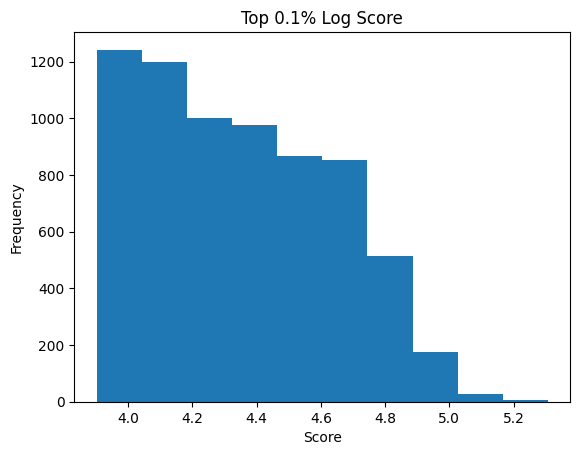

In [18]:
transformed_one_percent = zero_one_percent['score'].values
transformed_one_percent = np.log10(transformed_one_percent)
plt.hist(transformed_one_percent)
plt.title('Top 0.1% Log Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.savefig('./figures/3.2-dist-top-zero-one-percent-log-score.jpg')
plt.show()

# 4. Next Steps

Where do we go from here?  

The submissions score distribution is heavily skewed. A large portion of submissions are concentrated near the bottom 99%.  
Only a very few posts can be considered "good".  

To somewhat balance this skewed dataset, we will derive two major sub groups of submissions by splitting the data long the mean score.  
The group of submissions belonging to below the mean will clearly be the majority group.  
As a solution, we will keep all submissions above the mean (as above average posts) and subsample the bottom majority.  


In [19]:
# Clear all previous temp data frames to reduce memory usage
del one_percent
del ninety_nine
del zero_one_percent

# And all temporary arrays/series
del transformed_one_percent
del filtered
del scores
del comments

In [25]:
# Mean score in submissions dataset
mean_score = submissions['score'].mean()
mean_score

37.84489897479949

In [26]:
# Split data along the mean
above_avg = submissions[submissions['score'] > mean_score]
below_avg = submissions[submissions['score'] <= mean_score]

In [27]:
above_avg.shape

(103812, 20)

In [28]:
below_avg.shape

(6756407, 20)

In [30]:
# Confirm the split did not remove any data
assert above_avg.shape[0] + below_avg.shape[0] == submissions.shape[0]

### 4.1 Subsample the below avg submissions

In [32]:
above_avg_count = above_avg.shape[0]
above_avg_count

103812

In [33]:
sampled = pd.concat([above_avg, below_avg.sample(above_avg_count)])

In [36]:
sampled['score'].mean()

1164.2001888028358

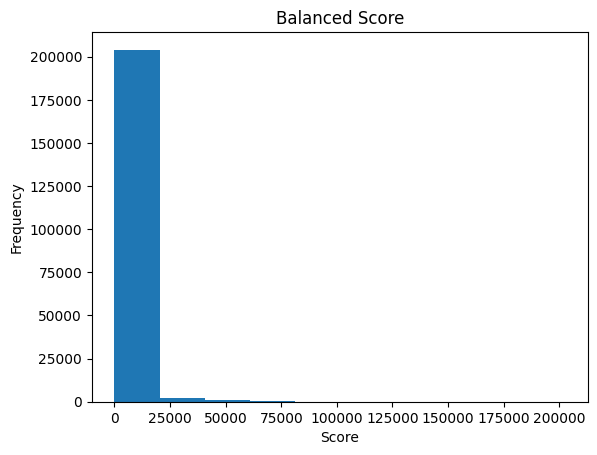

In [34]:
plt.hist(sampled['score'])
plt.title('Balanced Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [38]:
# Reset the index for the new dataframes
above_avg = above_avg.reset_index()
below_avg = above_avg.reset_index()
sampled = sampled.reset_index()

In [40]:
# Save the new dataframes
sampled.to_json('submissions-sampled.json.gz', compression='gzip', lines=True, orient='records')
above_avg.to_json('submissions-above-avg.json.gz', compression='gzip', lines=True, orient='records')
below_avg.to_json('submissions-below-avg.json.gz', compression='gzip', lines=True, orient='records')